In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_img(ax, img, title=None, cmap=None):
    ax.imshow(img);
    ax.axis('off')
    ax.set_title(title);

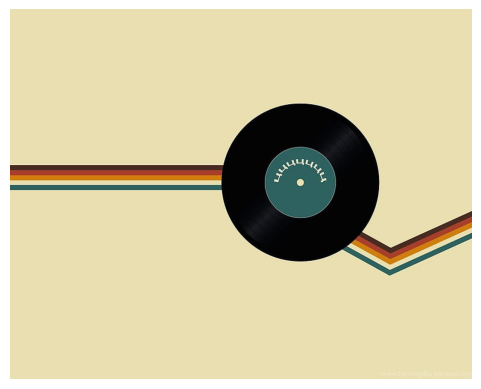

In [3]:
img1 = cv2.imread('images/disc.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.axis('off');

# Erosion and dilation

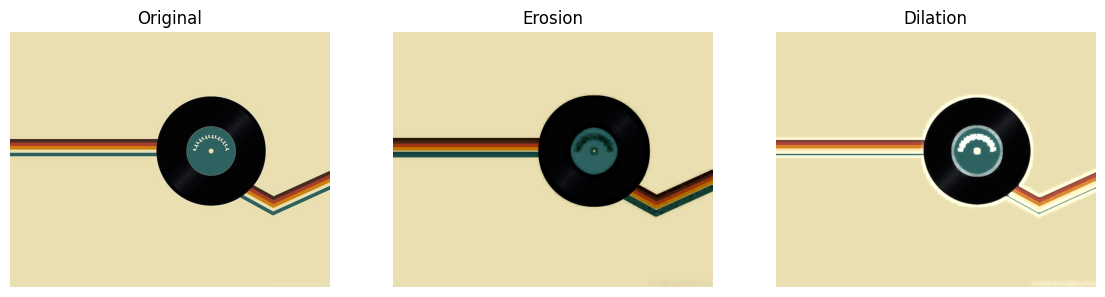

In [4]:
kernel = np.ones((7, 7), np.uint8)
img_erosion = cv2.erode(img1, kernel, iterations=1)
img_dilation = cv2.dilate(img1, kernel, iterations=1)

fig, axs = plt.subplots(1, 3, figsize = (14,7))
show_img(axs[0], img1, 'Original')
show_img(axs[1], img_erosion, 'Erosion')
show_img(axs[2], img_dilation, 'Dilation')

# Skeletonization

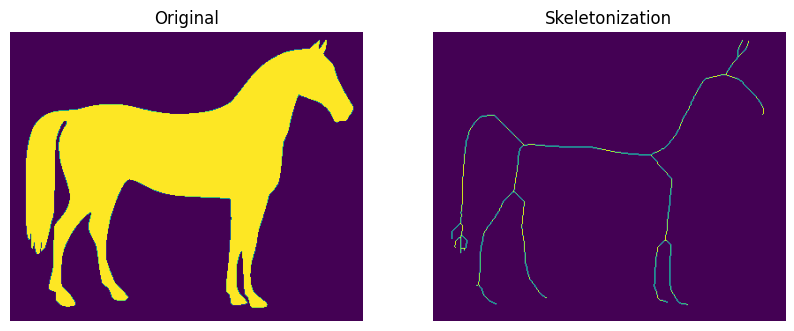

In [5]:
from skimage import data
from skimage.morphology import skeletonize
from skimage.util import invert

img2 = invert(data.horse())
skeleton_img = skeletonize(img2)

fig, axs = plt.subplots(1, 2, figsize = (10,5))
show_img(axs[0], img2, 'Original')
show_img(axs[1], skeleton_img, 'Skeletonization')

# Removing small objects

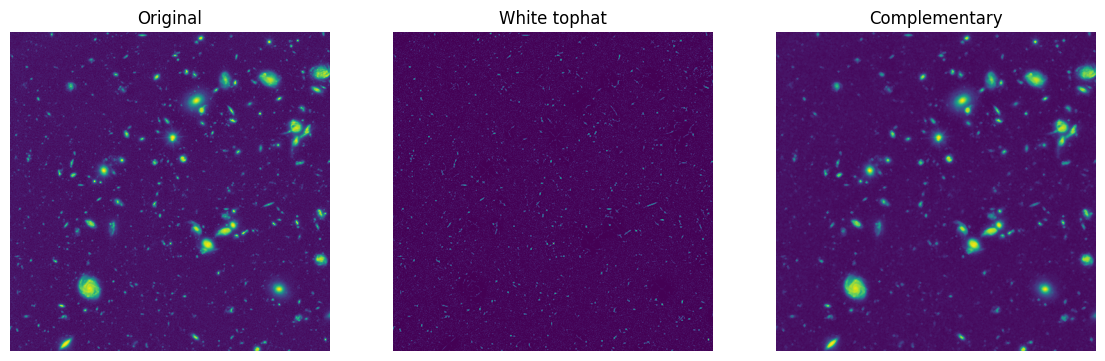

In [6]:
from skimage import color, morphology

img3 = color.rgb2gray(data.hubble_deep_field())[:500, :500]

footprint = morphology.disk(1)
res = morphology.white_tophat(img3, footprint)

fig, axs = plt.subplots(1, 3, figsize = (14,7))
show_img(axs[0], img3, 'Original', cmap='gray')
show_img(axs[1], res, 'White tophat', cmap='gray')
show_img(axs[2], img3-res, 'Complementary', cmap='gray')

# Extracting boundaries

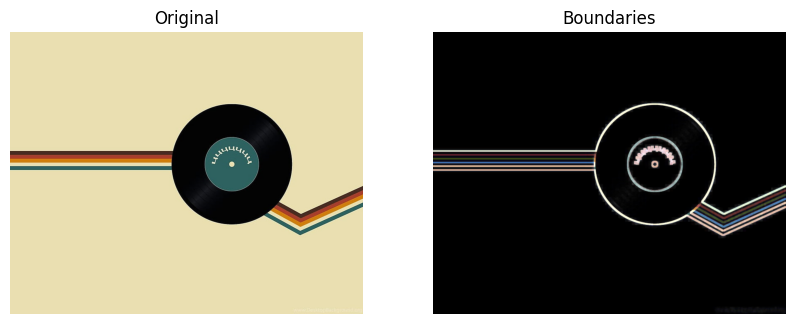

In [7]:
kernel = np.ones((5, 5), np.uint8)
gradient = cv2.morphologyEx(img1, cv2.MORPH_GRADIENT, kernel)

fig, axs = plt.subplots(1, 2, figsize = (10,5))
show_img(axs[0], img1, 'Original')
show_img(axs[1], gradient, 'Boundaries')